# Temple artifact data

In [51]:
#%% Import libraries
import os
import mne
import sys
import time
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib.collections as collections
sys.path.append("..") # Adds higher directory to python modules path.
from Functions import artifact_removal_tools as art
from IPython.display import clear_output

## Import data


In [52]:
## Enable to raw and process data
save_data = False

#%% Data path and files
notebook_dir = os.getcwd()
data_folder = notebook_dir + "\\Data\\Imported"  # Data folder
file_names = os.listdir(path=data_folder)         # List of subjects

# Preallocate variables
n_files = len(file_names)   # Number of files
eye_eeg = [None] * n_files
mus_eeg = [None] * n_files
srate = [None] * n_files
chans = [None] * n_files

# EEG valid channels
# - List of valid EEG channels to separate them from other types of data
eeg_valid_chans = np.array(['FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8',
                    'T3','T4','T5','T6','T1','T2','FZ','CZ','PZ'])

for i,file in enumerate(file_names):
    # Load temporary data
    temp_data = np.load(data_folder+'\\'+file, allow_pickle=True)
    
    # Get index of valid EEG channels
    chans[i] = temp_data['chans']   # List of all channels
    eeg_idx = np.zeros(np.size(eeg_valid_chans), dtype=int) # Temporary index for channels
    print(f'{file} loaded')
    for ci,c in enumerate(eeg_valid_chans): # For channel_index in channel
        if np.size(np.where(chans[i]==c)) > 0:
            eeg_idx[ci] = (np.where(chans[i]==c)[0])

    eeg_idx = np.sort(eeg_idx)      # Sort list of channels
    chans[i] = chans[i][eeg_idx]    # Select only valid channels
    
    # Separate data in variables - Select only valid channels
    eye_artifacts = np.size(temp_data['eye_eeg'])
    eye_eeg[i] = [None] * eye_artifacts
    for eye in range(eye_artifacts):
        eye_eeg[i][eye] = temp_data['eye_eeg'][eye][:,eeg_idx]

    mus_artifacts = np.size(temp_data['mus_eeg'])
    mus_eeg[i] = [None] * mus_artifacts
    for mus in range(mus_artifacts):
        mus_eeg[i][mus] = temp_data['mus_eeg'][mus][:,eeg_idx]
    
    srate[i] = temp_data['srate']
    
    del temp_data   # Delete temporary data from memory

00000254_s007_t000.npz loaded
00000630_s002_t001.npz loaded
00001355_s003_t000.npz loaded


In [53]:
temp_data = np.load

## Eye movement artifacts

### Clean eye movement

In [54]:
eye_clean = [None] * n_files    # Preallocate eye artifact clean
artifacts = 3

for i in range(artifacts):
    eye_clean[i] = [None] * artifacts

    for a in range(artifacts):
        [eye_clean[i][a],_,_] = art.remove_eyeblinks_cpu(eye_eeg[i][a], srate=srate[i], window_length=0.5)



### Plot eye movement - raw and cleaned

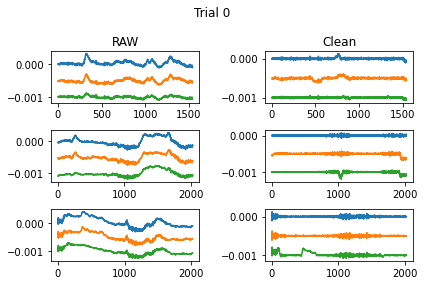

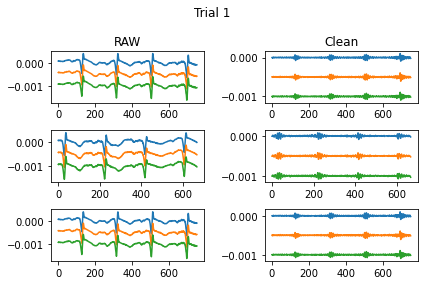

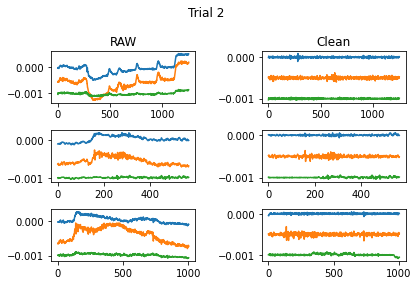

In [55]:
trials = [0,1,2]
artifacts = [0,1,2]
channels = [0,1,2]
offset = 50e-5
for t in trials:
    fig, ax = plt.subplots(len(artifacts),2)
    fig.suptitle(f'Trial {t}')
    for a in range(len(artifacts)):
        ax[0][0].set_title('RAW')
        ax[0][1].set_title('Clean')
        for c in range(len(channels)):
            ax[a][0].plot(eye_eeg[t][a][:,c] - c*offset)
            ax[a][1].plot(eye_clean[t][a][:,c]- c*offset)
    plt.tight_layout()



## Muscle artifacts

## Clean muscle artifacts

In [56]:
len(mus_eeg[2])

18

In [57]:
mus_clean = [None] * n_files    # Preallocate eye artifact clean
artifacts = 3

for i in range(artifacts):
    mus_clean[i] = [None] * artifacts

    for a in range(artifacts):
        [mus_clean[i][a],_,_] = art.remove_eyeblinks_cpu(mus_eeg[i][a], srate=srate[i], window_length=0.5)

### Plot muscle artifacts

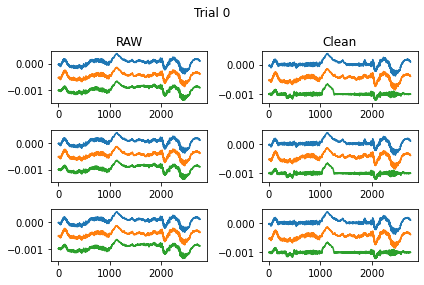

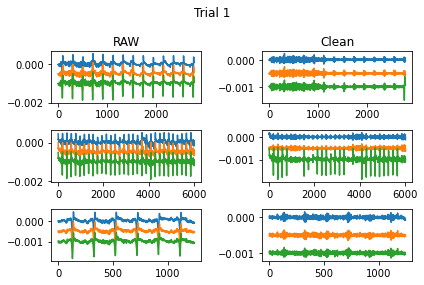

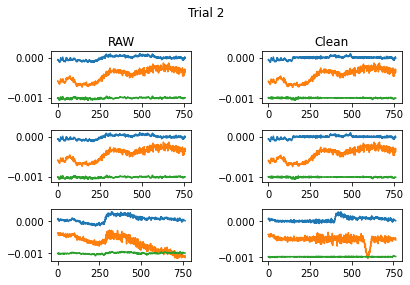

In [58]:
trials = [0,1,2]
artifacts = [0,1,2]
channels = [0,1,2]
offset = 50e-5
for t in trials:
    fig, ax = plt.subplots(len(artifacts),2)
    fig.suptitle(f'Trial {t}')
    for a in range(len(artifacts)):
        ax[0][0].set_title('RAW')
        ax[0][1].set_title('Clean')
        for c in range(len(channels)):
            ax[a][0].plot(mus_eeg[t][a][:,c] - c*offset)
            ax[a][1].plot(mus_clean[t][a][:,c]- c*offset)
    plt.tight_layout()

## Save data

Save data to NPZ file for further analysis

In [60]:
save_file = 'art_w05'

if save_data:
    np.savez(save_file, eye_raw=eye_eeg, mus_raw=mus_eeg, srate=srate, eye_clean=eye_clean, mus_clean=mus_clean)
    

c:\Users\danie\anaconda3\envs\bci_art\lib\site-packages\numpy\lib\npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)
